In [9]:
import pandas as pd
print(pd.__version__)

2.2.2


In [15]:
data = pd.read_csv(r'C:\mypython\Python_WebScraping_Analysis\data\인구현황.csv')
print(data.shape)
print(type(data))
data.head()

(18, 8)
<class 'pandas.core.frame.DataFrame'>


,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,1000000000,전국,51217221,24118928,2.12,25498324,25718897,0.99
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00


In [34]:

data = data[data['행정기관'] != '전국']
data

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00
5,2900000000,광주광역시,1408422,658075,2.14,695224,713198,0.97
6,3000000000,대전광역시,1439157,687757,2.09,717291,721866,0.99
7,3100000000,울산광역시,1098049,495378,2.22,564888,533161,1.06
8,3600000000,세종특별자치시,390685,163432,2.39,194413,196272,0.99
9,4100000000,경기도,13694685,6058202,2.26,6882186,6812499,1.01
10,5100000000,강원특별자치도,1517766,764834,1.98,763025,754741,1.01


In [35]:

#1. 지역별 총인구수 Top5
data[['행정기관','총인구수']].sort_values(by='총인구수', ascending= False).head().reset_index(drop=True)

,행정기관,총인구수
0,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
3,경상남도,3228380
4,인천광역시,3021010


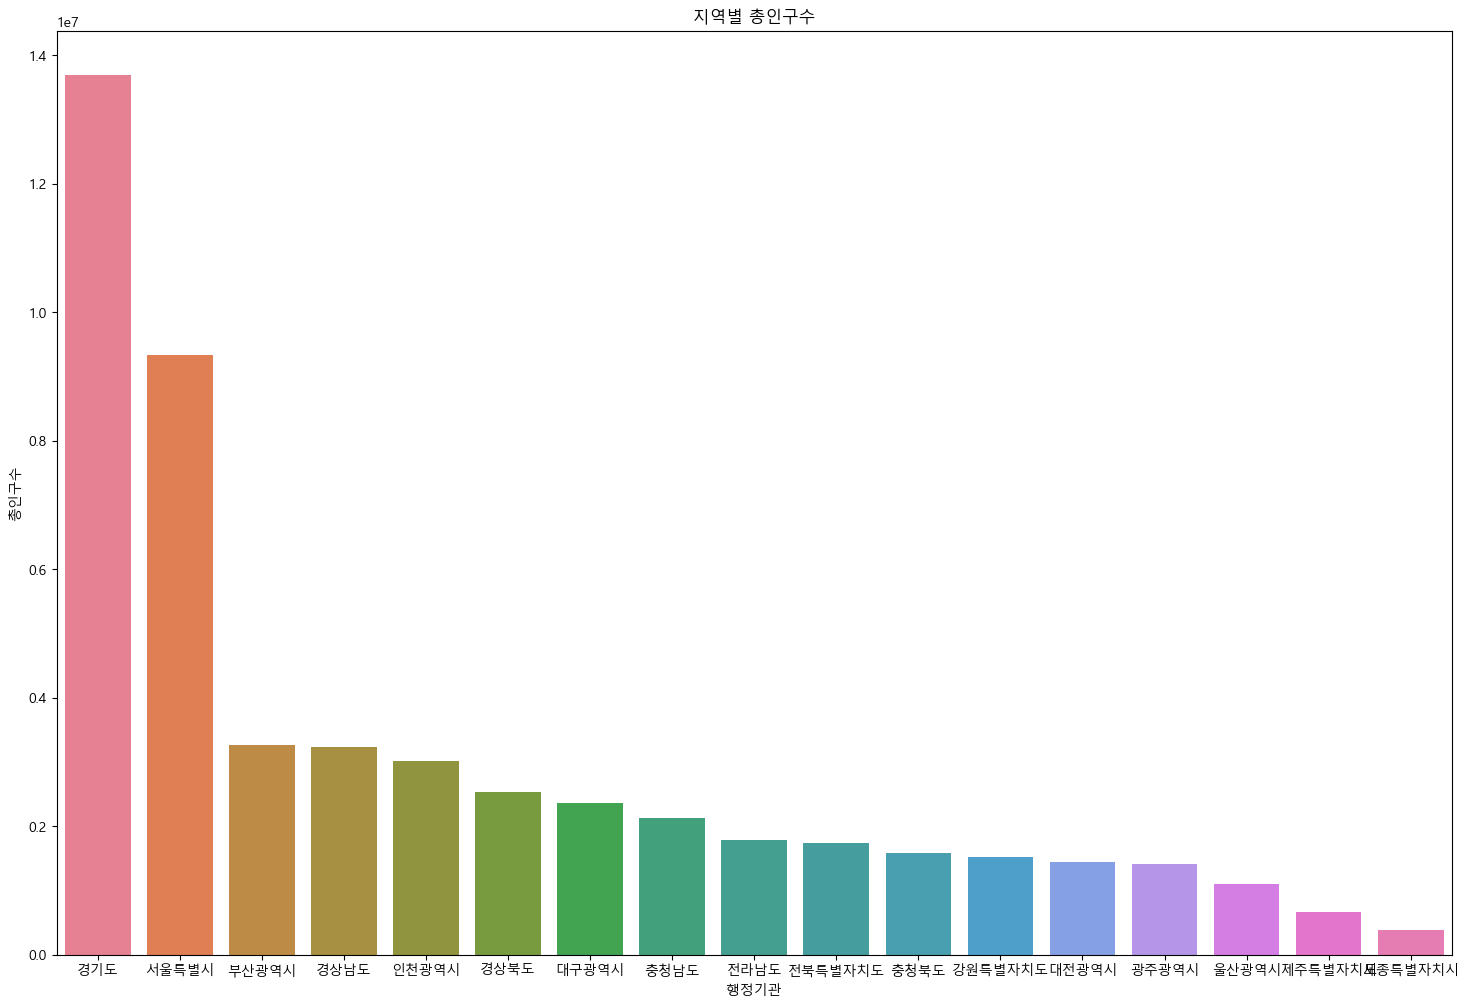

In [57]:
#1-1. 지역별 총인구수 plot
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
[ (font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name ]
font_path = 'C:\\windows\\Fonts\\malgun.ttf'
font_prop = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font_prop)

figure, axes1 = plt.subplots(1,1)
figure.set_size_inches(18,12)
area_plot = sns.barplot(x='행정기관', y='총인구수', data=data.sort_values(by='총인구수', ascending=False), ax=axes1, hue='행정기관')
area_plot.set_title(f'지역별 총인구수')
plt.show()

In [62]:
# 세대당 인구수 높은 지역 Top5
data[['행정기관','세대당 인구']].sort_values(by='세대당 인구', ascending = False).head().reset_index(drop=True)

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


Text(0.5, 1.0, '지역별 세대당 인구')

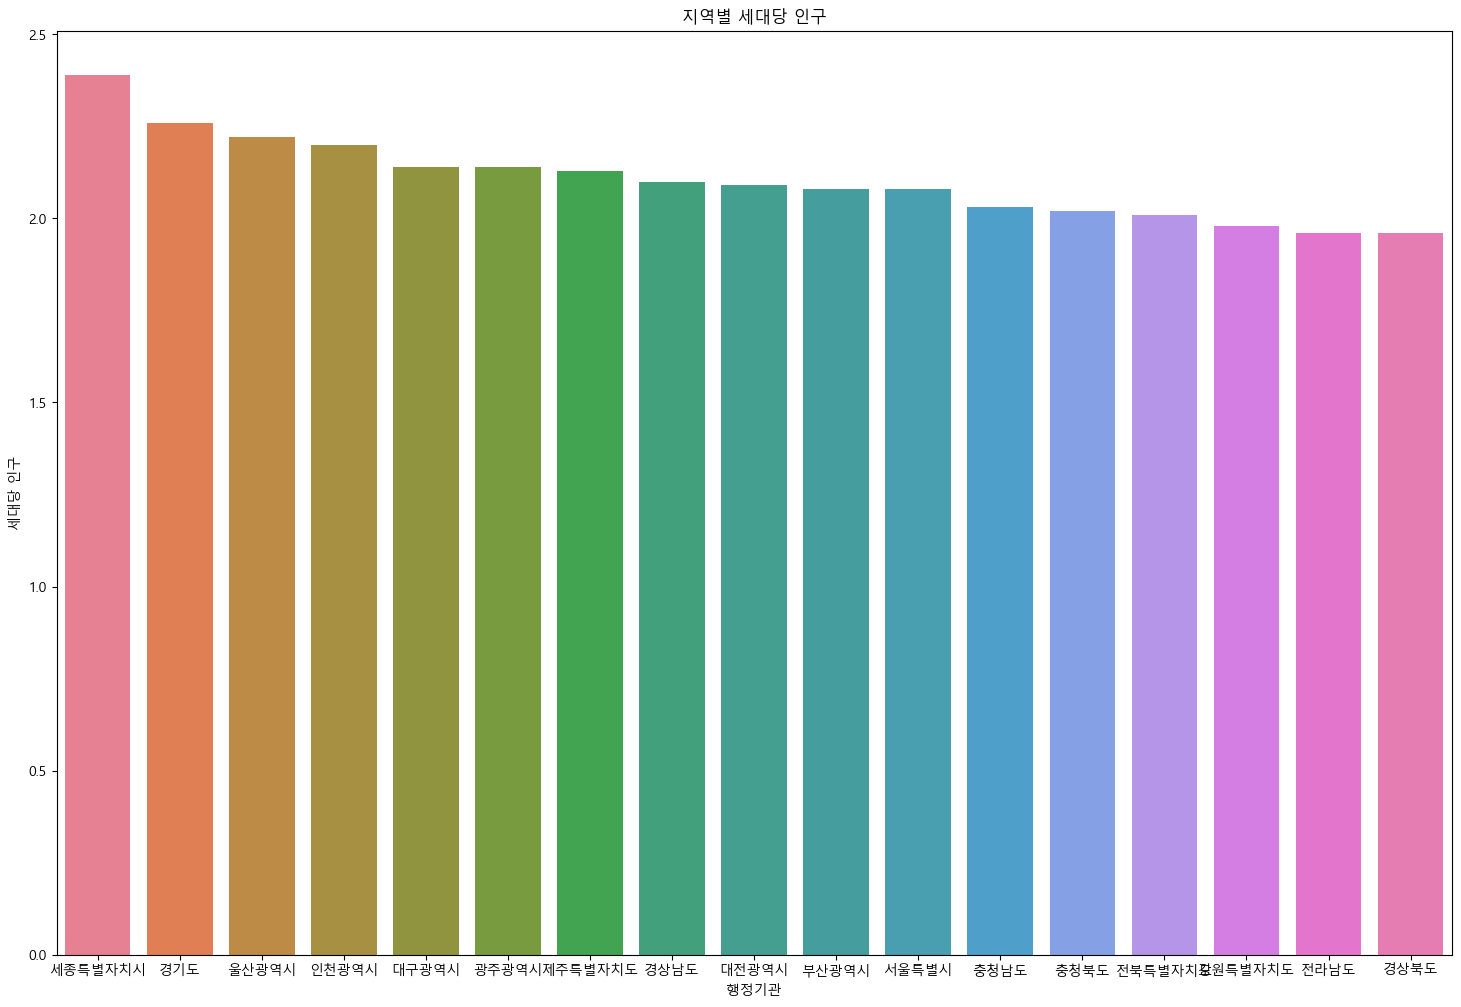

In [58]:
# 지역별 세대당 인구 Plot
figure,axes1 = plt.subplots(1,1)
figure.set_size_inches(18,12)
area_plot = sns.barplot(x='행정기관', y='세대당 인구', data = data.sort_values(by='세대당 인구',ascending=False), ax=axes1, hue = '행정기관')
area_plot.set_title(f'지역별 세대당 인구')

In [64]:
# 3. 남녀 비율 분석
data[['행정기관', '남여 비율']].sort_values(by = '남여 비율', ascending = False).reset_index(drop=True)

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


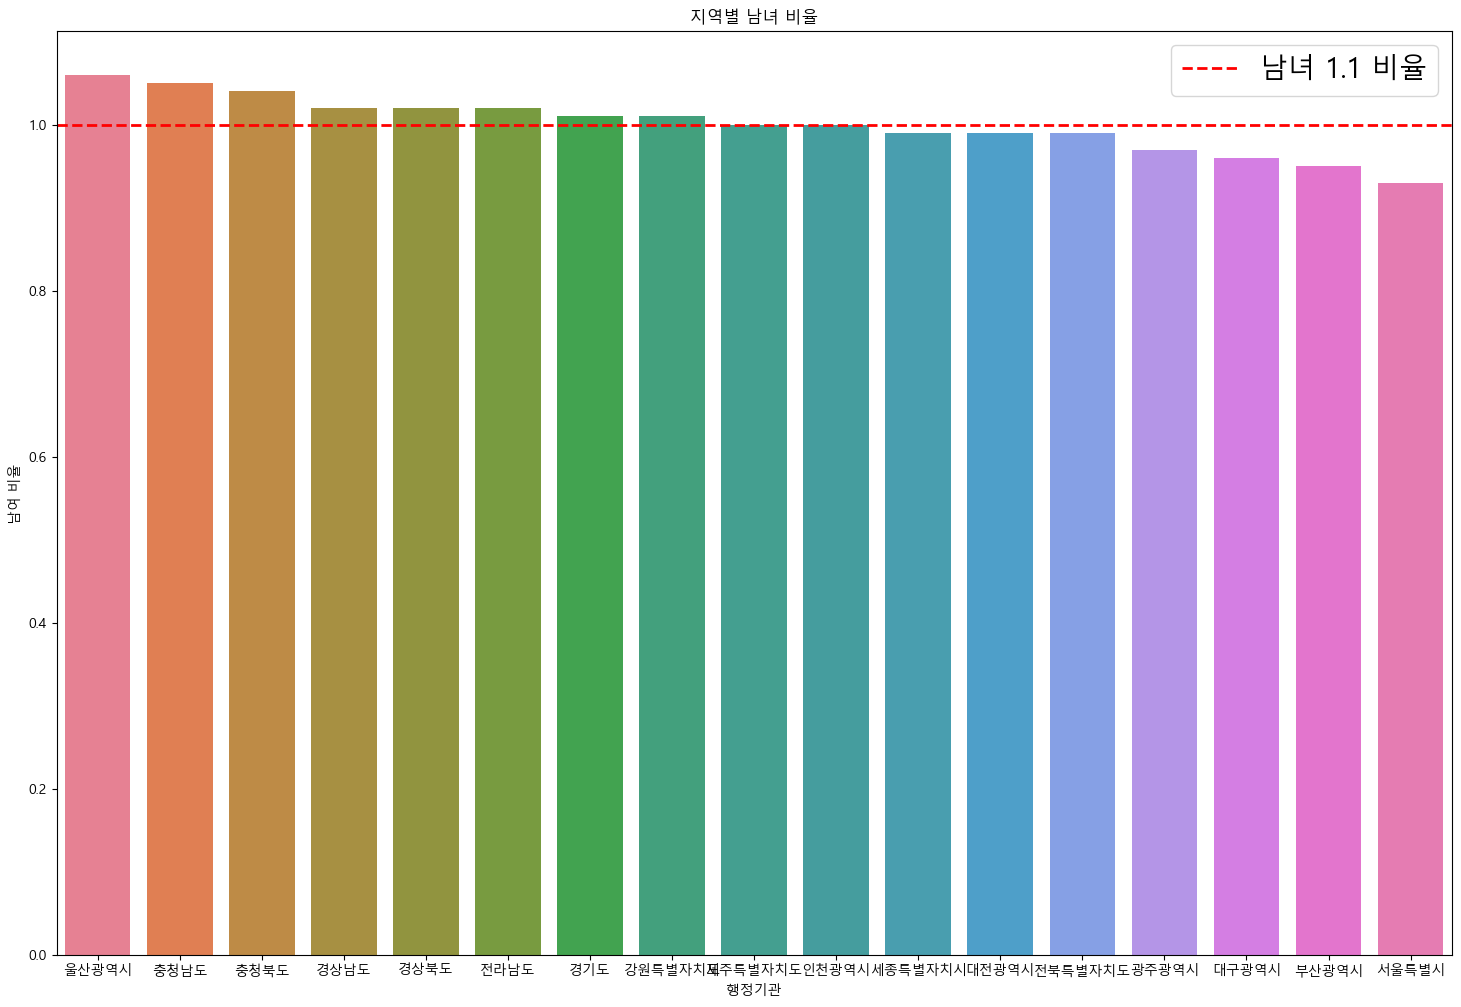

In [75]:
# 3-1. 남녀 비율 분석 Plot
from matplotlib.pyplot import axhline


figure, axes1 = plt.subplots(1,1)
figure.set_size_inches(18,12)
area_plot = sns.barplot(x='행정기관', y='남여 비율', data = data.sort_values(by='남여 비율', ascending=False), ax = axes1, hue = '행정기관')
axes1.set_title("지역별 남녀 비율")
axes1.axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='남녀 1.1 비율')
axes1.legend(fontsize=20)

In [ ]:
# 4. 남자초과 / 여자초과 분석
data['남초여초'] = data['남여 비율'].map(lambda x: '남초' if x > 1 else '여초' if x < 1 else '동일')
data[['행정기관', '남여 비율', '남초여초']].reset_index(drop=True)



,행정기관,남여 비율,남초여초
0,서울특별시,0.93,여초
1,부산광역시,0.95,여초
2,대구광역시,0.96,여초
3,인천광역시,1.00,동일
4,광주광역시,0.97,여초
5,대전광역시,0.99,여초
6,울산광역시,1.06,남초
7,세종특별자치시,0.99,여초
8,경기도,1.01,남초
9,강원특별자치도,1.01,남초


In [94]:
# 5.세대당 인구 평균보다 높은 지역
pop_mean = data['세대당 인구'].mean()
p_mean = data.loc[data['세대당 인구'] > pop_mean].copy().sort_values(by='세대당 인구', ascending = False).reset_index(drop=True)
p_mean[['행정기관', '세대당 인구']]


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


Text(0.5, 1.0, '지역별 세대수')

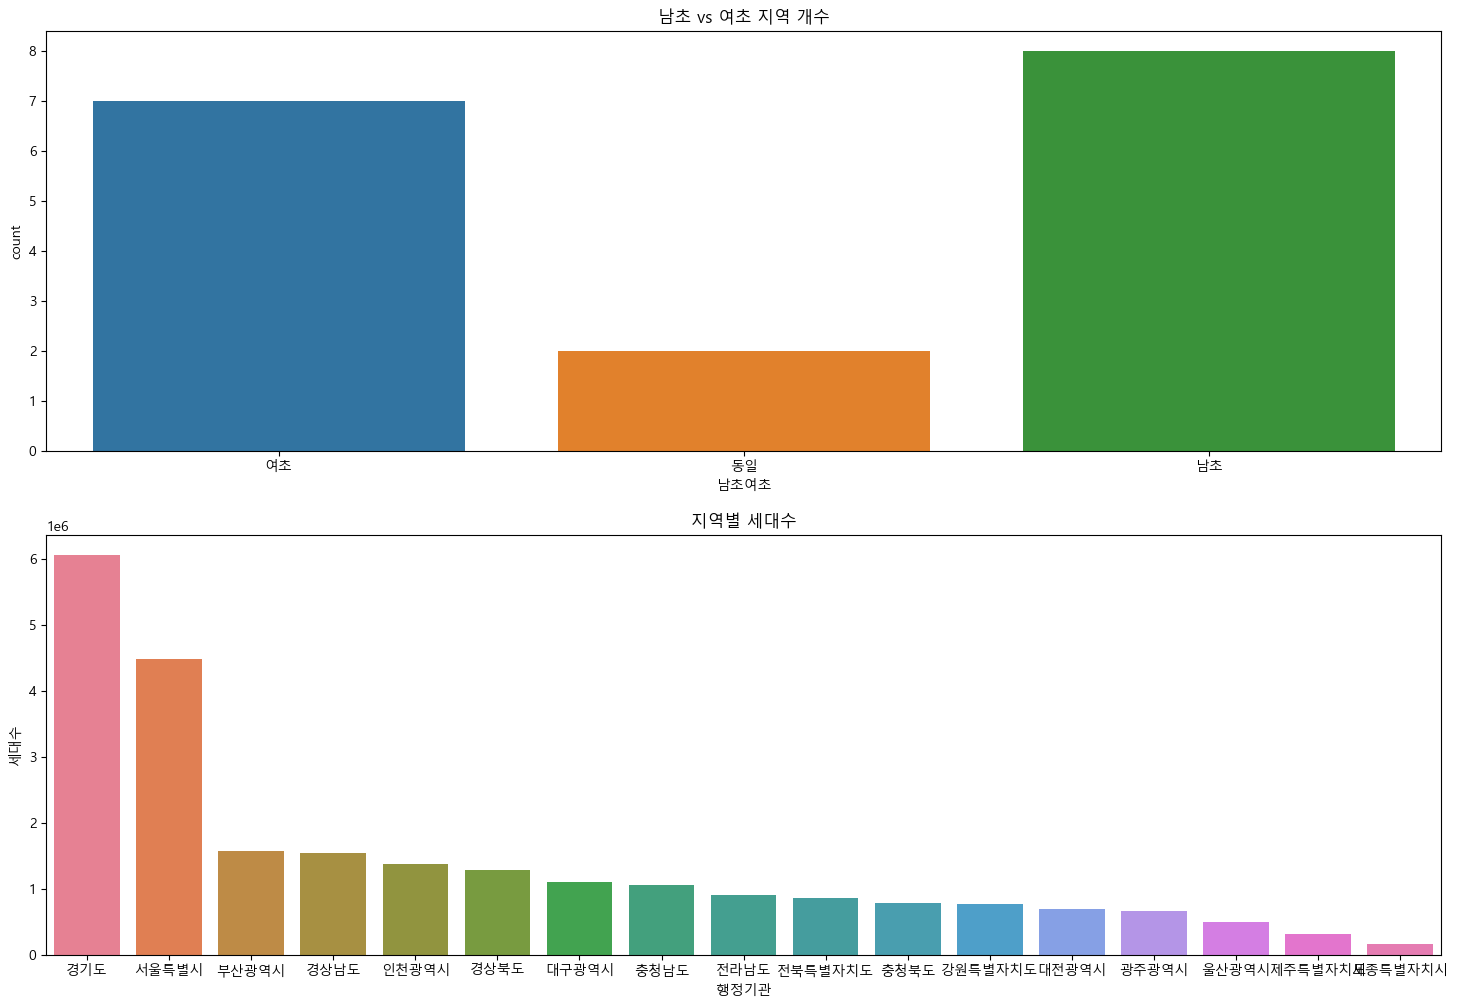

In [106]:
# 5-1.   남초 vs 여초 개수 Plot  ( seaborn의 countplot ), 지역별 세대수 Plot ( seaborn의 barplot )
figure,(axes1,axes2) = plt.subplots(2,1)
figure.set_size_inches(18,12)

area1_plot = sns.countplot(x = '남초여초', data=data, ax = axes1, hue = '남초여초')
axes1.set_title("남초 vs 여초 지역 개수")

area2_plot = sns.barplot(x = '행정기관', y = '세대수', data = data.sort_values(by='세대수',ascending=False), ax = axes2, hue = '행정기관')
axes2.set_title("지역별 세대수")